#Train

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

In [3]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSOK2qkZ0WCM_MFIIdQSKmekXnH1uaOsVsy-TFlw6_a-EwitfiHx_LG14Ma-cl1Yxg83Wjn8GtSJEvt/pub?gid=1391324763&single=true&output=csv')
df

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,26.52,89.93,-60.46,1137.04,-3.49,NaN,-5.88,-17.13,7.44
1,-68.18,-127.21,23.30,1471.49,16.95,2.30,-11.51,-7.70,7.31
2,-95.05,36.10,-75.27,1158.04,6.97,3.21,-5.86,8.65,-5.77
3,124.40,-8.19,NaN,5527.92,7.36,7.23,10.77,1.92,-0.42
4,-103.25,NaN,-2.89,4865.06,-5.21,-1.54,NaN,4.69,4.31
...,...,...,...,...,...,...,...,...,...
185,34.29,-38.65,-44.41,9775.28,-3.43,4.95,4.60,-11.73,11.78
186,1.62,145.02,53.26,4546.80,11.81,-4.31,4.86,-0.42,3.79
187,29.46,33.91,-20.96,6083819.57,5.10,2.93,1.23,3.23,-3.17
188,-64.93,25.39,-118.74,1746.40,226.26,-1.91,-16.11,-10.44,0.97


In [4]:
low, high = df["x1"].quantile([0.05, 0.95])
df.loc[df[df["x1"]<low].index,"x1"]=low
df.loc[df[df["x1"]>high].index,"x1"]=high

low, high = df["x2"].quantile([0.05, 0.95])
df.loc[df[df["x2"]<low].index,"x2"]=low
df.loc[df[df["x2"]>high].index,"x2"]=high

low, high = df["x3"].quantile([0.05, 0.95])
df.loc[df[df["x3"]<low].index,"x3"]=low
df.loc[df[df["x3"]>high].index,"x3"]=high

low, high = df["x4"].quantile([0.05, 0.95])
df.loc[df[df["x4"]<low].index,"x4"]=low
df.loc[df[df["x4"]>high].index,"x4"]=high

low, high = df["x5"].quantile([0.05, 0.95])
df.loc[df[df["x5"]<low].index,"x5"]=low
df.loc[df[df["x5"]>high].index,"x5"]=high

low, high = df["x6"].quantile([0.05, 0.95])
df.loc[df[df["x6"]<low].index,"x6"]=low
df.loc[df[df["x6"]>high].index,"x6"]=high

low, high = df["x7"].quantile([0.05, 0.95])
df.loc[df[df["x7"]<low].index,"x7"]=low
df.loc[df[df["x7"]>high].index,"x7"]=high

low, high = df["x8"].quantile([0.05, 0.95])
df.loc[df[df["x8"]<low].index,"x8"]=low
df.loc[df[df["x8"]>high].index,"x8"]=high

In [5]:
df["x1"].fillna(df["x1"].mean(), inplace=True)
df["x2"].fillna(df["x2"].mean(), inplace=True)
df["x3"].fillna(df["x3"].mean(), inplace=True)
df["x4"].fillna(df["x4"].mean(), inplace=True)
df["x5"].fillna(df["x5"].mean(), inplace=True)
df["x6"].fillna(df["x6"].mean(), inplace=True)
df["x7"].fillna(df["x7"].mean(), inplace=True)
df["x8"].fillna(df["x8"].mean(), inplace=True)
df.dropna(subset=["y"], inplace=True)
df

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,26.52,89.930000,-60.460000,1137.04,-3.4900,1.982897,-5.880000,-17.13,7.44
1,-68.18,-127.210000,23.300000,1471.49,16.9500,2.300000,-11.510000,-7.70,7.31
2,-95.05,36.100000,-75.270000,1158.04,6.9700,3.210000,-5.860000,8.65,-5.77
3,124.40,-8.190000,-3.400856,5527.92,7.3600,7.230000,10.770000,1.92,-0.42
4,-103.25,6.012117,-2.890000,4865.06,-5.2100,-1.540000,-0.158381,4.69,4.31
...,...,...,...,...,...,...,...,...,...
185,34.29,-38.650000,-44.410000,9775.28,-3.4300,4.950000,4.600000,-11.73,11.78
186,1.62,145.020000,53.260000,4546.80,11.8100,-4.310000,4.860000,-0.42,3.79
187,29.46,33.910000,-20.960000,46945.89,5.1000,2.930000,1.230000,3.23,-3.17
188,-64.93,25.390000,-118.740000,1746.40,18.5295,-1.910000,-16.110000,-10.44,0.97


In [6]:
df.reset_index(inplace=True)

In [7]:
df

,index,x1,x2,x3,x4,x5,x6,x7,x8,y
0,0,26.52,89.930000,-60.460000,1137.04,-3.4900,1.982897,-5.880000,-17.13,7.44
1,1,-68.18,-127.210000,23.300000,1471.49,16.9500,2.300000,-11.510000,-7.70,7.31
2,2,-95.05,36.100000,-75.270000,1158.04,6.9700,3.210000,-5.860000,8.65,-5.77
3,3,124.40,-8.190000,-3.400856,5527.92,7.3600,7.230000,10.770000,1.92,-0.42
4,4,-103.25,6.012117,-2.890000,4865.06,-5.2100,-1.540000,-0.158381,4.69,4.31
...,...,...,...,...,...,...,...,...,...,...
183,185,34.29,-38.650000,-44.410000,9775.28,-3.4300,4.950000,4.600000,-11.73,11.78
184,186,1.62,145.020000,53.260000,4546.80,11.8100,-4.310000,4.860000,-0.42,3.79
185,187,29.46,33.910000,-20.960000,46945.89,5.1000,2.930000,1.230000,3.23,-3.17
186,188,-64.93,25.390000,-118.740000,1746.40,18.5295,-1.910000,-16.110000,-10.44,0.97


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   188 non-null    int64  
 1   x1      188 non-null    float64
 2   x2      188 non-null    float64
 3   x3      188 non-null    float64
 4   x4      188 non-null    float64
 5   x5      188 non-null    float64
 6   x6      188 non-null    float64
 7   x7      188 non-null    float64
 8   x8      188 non-null    float64
 9   y       188 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 14.8 KB


In [9]:
df.describe()

,index,x1,x2,x3,x4,x5,x6,x7,x8,y
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,95.111702,13.364351,4.898610,-2.992833,10089.525484,0.087128,2.030056,-0.208629,-0.613189,3.949309
std,54.945119,89.769556,94.911509,81.823780,12887.046943,9.329964,8.932347,8.717640,9.454256,8.350511
min,0.000000,-137.640000,-168.644500,-175.146500,23.620000,-15.997500,-13.461000,-17.369000,-18.910000,-15.510000
25%,47.750000,-53.820000,-59.062500,-58.965000,1373.082500,-5.632500,-4.427500,-5.735000,-6.980000,-2.260000
50%,95.500000,13.978508,6.012117,-3.145428,4821.315000,0.150211,1.982897,-0.158381,-0.581050,3.555000
75%,142.250000,69.737500,77.417500,49.927500,11813.547500,6.382500,8.247500,5.720000,6.305000,10.620000
max,189.000000,192.110000,167.633500,145.450500,46945.890000,18.529500,19.544500,16.732500,16.270000,28.200000


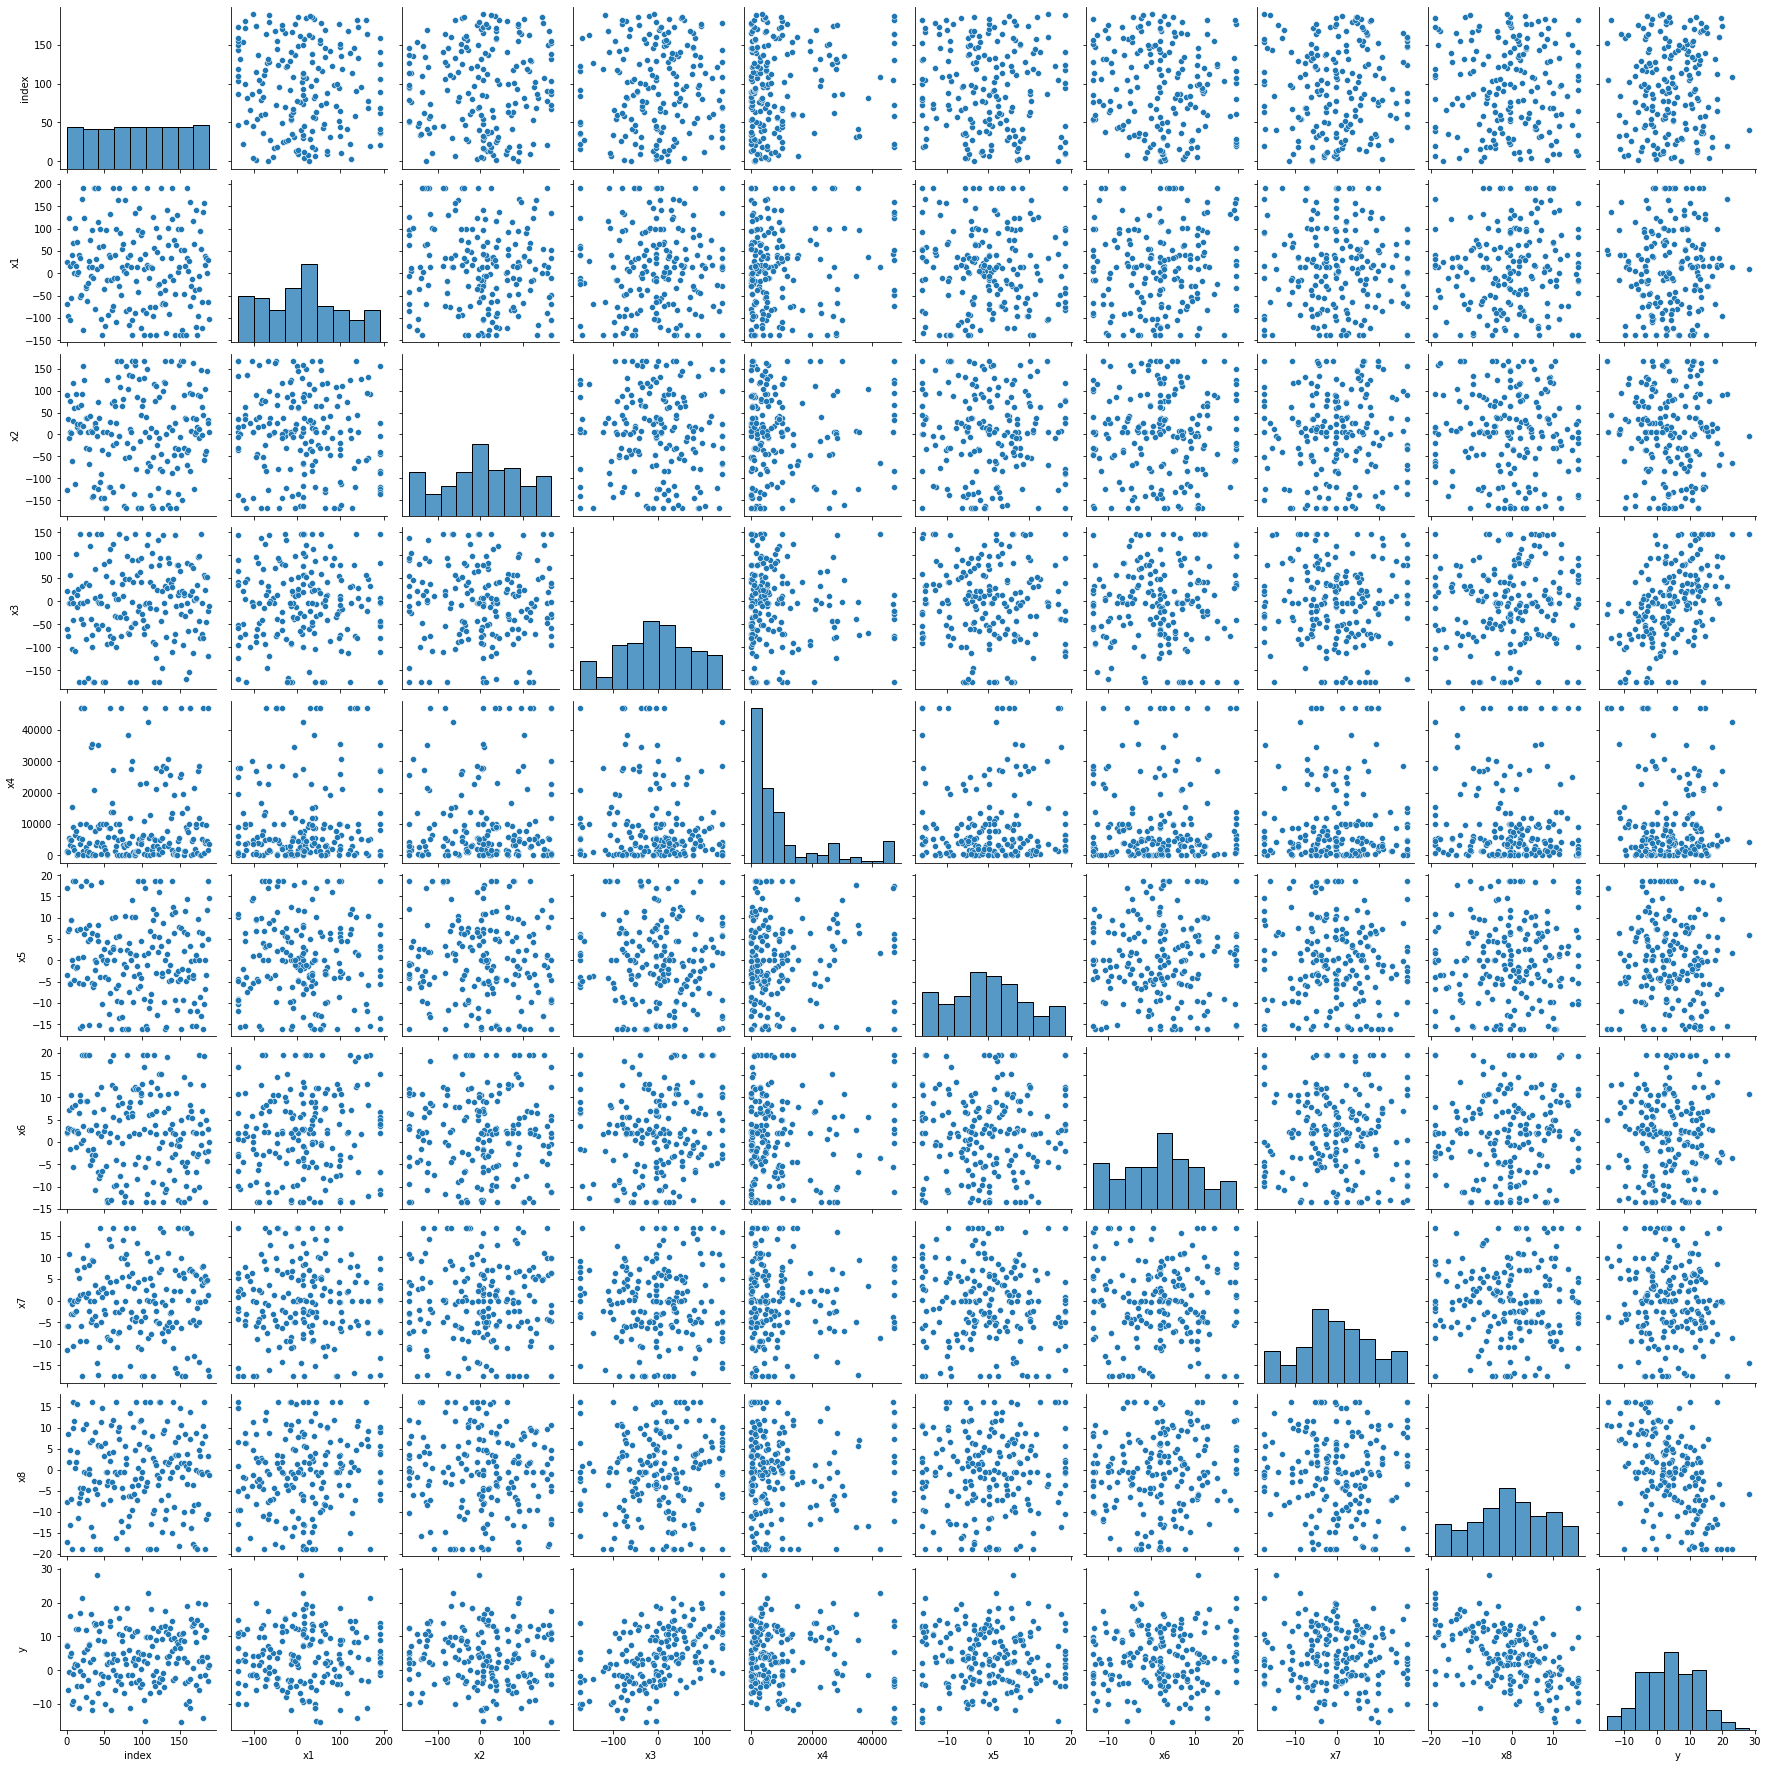

In [10]:
sns.pairplot(df)

In [11]:
df.corr()

,index,x1,x2,x3,x4,x5,x6,x7,x8,y
index,1.000000,-0.070522,0.045073,0.070812,0.124981,-0.064149,-0.101423,0.050068,-0.007154,0.061068
x1,-0.070522,1.000000,-0.115518,0.013281,0.078957,-0.025283,0.085953,-0.010901,0.105329,0.031349
x2,0.045073,-0.115518,1.000000,-0.041721,0.080845,-0.046342,0.018917,0.041176,-0.067275,-0.067427
x3,0.070812,0.013281,-0.041721,1.000000,-0.134878,-0.042768,0.065256,-0.015801,0.093805,0.507176
x4,0.124981,0.078957,0.080845,-0.134878,1.000000,0.012263,-0.008372,0.031138,-0.027126,-0.103744
x5,-0.064149,-0.025283,-0.046342,-0.042768,0.012263,1.000000,0.037684,-0.066342,0.045530,-0.043181
x6,-0.101423,0.085953,0.018917,0.065256,-0.008372,0.037684,1.000000,0.009129,0.073652,0.066750
x7,0.050068,-0.010901,0.041176,-0.015801,0.031138,-0.066342,0.009129,1.000000,-0.014508,-0.073479
x8,-0.007154,0.105329,-0.067275,0.093805,-0.027126,0.045530,0.073652,-0.014508,1.000000,-0.486135
y,0.061068,0.031349,-0.067427,0.507176,-0.103744,-0.043181,0.066750,-0.073479,-0.486135,1.000000


In [12]:
X = df[['x3','x8']]
y = df['y']

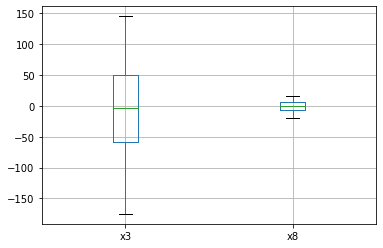

In [13]:
X.boxplot()

In [14]:
scaler = preprocessing.StandardScaler().fit(X)
X = pd.DataFrame(scaler.transform(X))

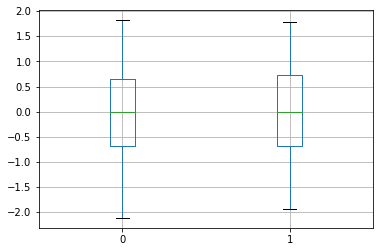

In [15]:
X.boxplot()

In [16]:
k = 5
kf = KFold(n_splits=k)

In [17]:
round_num = 1
RMSEs = []

for train_index, test_index in kf.split(X):
  print("Round", round_num)
  print("  TRAIN:", train_index[0:10],"...")
  print("  TEST:", test_index[0:5],"...")

  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]

  lm = LinearRegression()
  lm.fit(X_train,y_train)

  y_pred = lm.predict(X_test)

  rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("  RMSE = ", rmse)
  RMSEs.append(rmse)

  print("------------------------------------")
  round_num+=1

Round 1
  TRAIN: [38 39 40 41 42 43 44 45 46 47] ...
  TEST: [0 1 2 3 4] ...
  RMSE =  6.006047476819984
------------------------------------
Round 2
  TRAIN: [0 1 2 3 4 5 6 7 8 9] ...
  TEST: [38 39 40 41 42] ...
  RMSE =  7.332534292472756
------------------------------------
Round 3
  TRAIN: [0 1 2 3 4 5 6 7 8 9] ...
  TEST: [76 77 78 79 80] ...
  RMSE =  4.278610773466325
------------------------------------
Round 4
  TRAIN: [0 1 2 3 4 5 6 7 8 9] ...
  TEST: [114 115 116 117 118] ...
  RMSE =  5.404110418412386
------------------------------------
Round 5
  TRAIN: [0 1 2 3 4 5 6 7 8 9] ...
  TEST: [151 152 153 154 155] ...
  RMSE =  5.188845654731118
------------------------------------


In [18]:
print(RMSEs)
kfold_rmse = np.array(RMSEs).mean()
print("K-Fold CV", "RMSE = ", kfold_rmse)

[6.006047476819984, 7.332534292472756, 4.278610773466325, 5.404110418412386, 5.188845654731118]
K-Fold CV RMSE =  5.6420297231805145


#Predict

In [19]:
df_Train = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSOK2qkZ0WCM_MFIIdQSKmekXnH1uaOsVsy-TFlw6_a-EwitfiHx_LG14Ma-cl1Yxg83Wjn8GtSJEvt/pub?gid=1391324763&single=true&output=csv')
df_Test = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTg-Ej9S3Y86_Sd4dE-H75vC5KbxlB9v4mBTquDfzTtPEOPupaN3Q_9Dj6eYByTL-sxSIIvDpSzvjXg/pub?gid=587747439&single=true&output=csv')

In [20]:
low, high = df_Train["x1"].quantile([0.05, 0.95])
df_Train.loc[df_Train[df_Train["x1"]<low].index,"x1"]=low
df_Train.loc[df_Train[df_Train["x1"]>high].index,"x1"]=high

low, high = df_Train["x2"].quantile([0.05, 0.95])
df_Train.loc[df_Train[df_Train["x2"]<low].index,"x2"]=low
df_Train.loc[df_Train[df_Train["x2"]>high].index,"x2"]=high

low, high = df_Train["x3"].quantile([0.05, 0.95])
df_Train.loc[df_Train[df_Train["x3"]<low].index,"x3"]=low
df_Train.loc[df_Train[df_Train["x3"]>high].index,"x3"]=high

low, high = df_Train["x4"].quantile([0.05, 0.95])
df_Train.loc[df_Train[df_Train["x4"]<low].index,"x4"]=low
df_Train.loc[df_Train[df_Train["x4"]>high].index,"x4"]=high

low, high = df_Train["x5"].quantile([0.05, 0.95])
df_Train.loc[df_Train[df_Train["x5"]<low].index,"x5"]=low
df_Train.loc[df_Train[df_Train["x5"]>high].index,"x5"]=high

low, high = df_Train["x6"].quantile([0.05, 0.95])
df_Train.loc[df_Train[df_Train["x6"]<low].index,"x6"]=low
df_Train.loc[df_Train[df_Train["x6"]>high].index,"x6"]=high

low, high = df_Train["x7"].quantile([0.05, 0.95])
df_Train.loc[df_Train[df_Train["x7"]<low].index,"x7"]=low
df_Train.loc[df_Train[df_Train["x7"]>high].index,"x7"]=high

low, high = df_Train["x8"].quantile([0.05, 0.95])
df_Train.loc[df_Train[df_Train["x8"]<low].index,"x8"]=low
df_Train.loc[df_Train[df_Train["x8"]>high].index,"x8"]=high

In [21]:
df_Train["x1"].fillna(df["x1"].mean(), inplace=True)
df_Train["x2"].fillna(df["x2"].mean(), inplace=True)
df_Train["x3"].fillna(df["x3"].mean(), inplace=True)
df_Train["x4"].fillna(df["x4"].mean(), inplace=True)
df_Train["x5"].fillna(df["x5"].mean(), inplace=True)
df_Train["x6"].fillna(df["x6"].mean(), inplace=True)
df_Train["x7"].fillna(df["x7"].mean(), inplace=True)
df_Train["x8"].fillna(df["x8"].mean(), inplace=True)
df_Train.dropna(subset=["y"], inplace=True)

In [22]:
df_Test["x1"].fillna(df["x1"].mean(), inplace=True)
df_Test["x2"].fillna(df["x2"].mean(), inplace=True)
df_Test["x3"].fillna(df["x3"].mean(), inplace=True)
df_Test["x4"].fillna(df["x4"].mean(), inplace=True)
df_Test["x5"].fillna(df["x5"].mean(), inplace=True)
df_Test["x6"].fillna(df["x6"].mean(), inplace=True)
df_Test["x7"].fillna(df["x7"].mean(), inplace=True)
df_Test["x8"].fillna(df["x8"].mean(), inplace=True)

In [23]:
df_Train.reset_index(inplace=True)

In [24]:
X_train = df_Train[['x3','x8']]
y_train = df_Train['y']

In [25]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))

In [26]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [27]:
print("Coefficient:", lm.coef_)
print("Intercept:", lm.intercept_)

Coefficient: [ 4.64510818 -4.48463027]
Intercept: 3.949308510638298


In [28]:
df_Test

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,65.160000,4.49000,-105.750000,600.250000,-0.910000,2.030056,-1.360000,-7.430000,A_01
1,-24.740000,-1.55000,91.050000,2401.980000,-1.520000,13.600000,5.660000,10.590000,A_02
2,107.540000,-28.69000,-82.590000,25789.150000,5.290000,-8.560000,1.490000,-4.730000,A_03
3,12.020000,32.32000,-2.992833,2.760000,1.200000,-9.520000,-4.200000,7.480000,A_04
4,45.080000,96.62000,51.850000,1.280000,3.580000,0.520000,-6.860000,-0.780000,A_05
5,-122.810000,17.79000,-182.850000,2928.970000,-1.210000,-2.060000,9.680000,-8.590000,A_06
6,77.610000,-72.30000,97.280000,19173.940000,-9.290000,0.860000,7.060000,-8.060000,A_07
7,-79.360000,4.89861,-220.910000,10089.525484,7.240000,6.190000,-0.208629,9.710000,A_08
8,13.364351,188.39000,-16.470000,3976.560000,0.087128,-1.040000,-23.440000,-0.613189,A_09
9,-44.010000,131.65000,69.880000,1778.310000,-13.750000,-14.750000,-12.270000,-0.830000,A_10


In [29]:
X_Test = df_Test[['x3','x8']]

In [30]:
y_pred = lm.predict(X_Test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [31]:
for x in range(10):
  df_Test.loc[[x],['y_pred']] = y_pred[x]

In [33]:
df_Test[['y','y_pred']]

,y,y_pred
0,A_01,-453.950078
1,A_02,379.394173
2,A_03,-358.477875
3,A_04,-43.497758
4,A_05,248.296179
5,A_06,-806.885747
6,A_07,491.971552
7,A_08,-1065.747299
8,A_09,-69.805699
9,A_10,332.271711
